## Observations and Insights 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [159]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


In [160]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [161]:
# Checking the number of mice.
combined_data.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          25         40.146450           0                   1
                                                        30         40.668343           1                   1
                        

In [162]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data_clean = combined_data.drop_duplicates()
combined_data_clean.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                        30         34.711473           1                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          25         40.146450           0                   1
                                                        30         40.668343           1                   1
                        

In [163]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_g898 = combined_data.loc[(combined_data['Mouse ID']== 'g989')& (combined_data['Timepoint']==0)]
duplicate_data_g898

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [164]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [165]:
# Checking the number of mice in the clean DataFrame.
combined_data_clean['Mouse ID'].nunique()

249

## Summary Statistics

In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Summary Table and Mean
tumor_vol = combined_data_clean.copy()[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumor_vol_summary = tumor_vol.groupby('Drug Regimen').mean().reset_index()
tumor_vol_summary = tumor_vol_summary.rename(columns={'Tumor Volume (mm3)': 'Mean'})
#Median, then Merge to Summary Table
tumor_vol_median = tumor_vol.groupby('Drug Regimen').median().reset_index()
tumor_vol_median = tumor_vol_median.rename(columns={'Tumor Volume (mm3)': 'Median'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_median, on='Drug Regimen', how='left')
#Variance, then Merge to Summary Table
tumor_vol_var = tumor_vol.groupby('Drug Regimen').var().reset_index()
tumor_vol_var = tumor_vol_var.rename(columns={'Tumor Volume (mm3)': 'Variance'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_var, on='Drug Regimen', how='left')
#Standard deviation, then Merge to Summary Table
tumor_vol_std = tumor_vol.groupby('Drug Regimen').std().reset_index()
tumor_vol_std = tumor_vol_std.rename(columns={'Tumor Volume (mm3)': 'Standard Deviation'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_std, on='Drug Regimen', how='left')
#SEM, then Merge to Summary Table
tumor_vol_sem = tumor_vol.groupby('Drug Regimen').sem().reset_index()
tumor_vol_sem = tumor_vol_sem.rename(columns={'Tumor Volume (mm3)': 'SEM'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_sem, on='Drug Regimen', how='left')

#Formatting
tumor_vol_summary['Mean'] = tumor_vol_summary['Mean'].map("{:.3f}".format)
tumor_vol_summary['Median'] = tumor_vol_summary['Median'].map("{:.3f}".format)
tumor_vol_summary['Variance'] = tumor_vol_summary['Variance'].map("{:.3f}".format)
tumor_vol_summary['Standard Deviation'] = tumor_vol_summary['Standard Deviation'].map("{:.3f}".format)
tumor_vol_summary['SEM'] = tumor_vol_summary['SEM'].map("{:.3f}".format)


#Show Summary Table
tumor_vol_summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.368,50.910,42.278,6.502,0.514
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_summary_2 = tumor_vol.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_summary_2 = tumor_vol_summary_2.agg(['mean', 'median', 'var', 'std', 'sem'], axis='columns').reset_index()
tumor_vol_summary_2.columns = tumor_vol_summary_2.columns.droplevel()
#formatting and rename
tumor_vol_summary_2['mean'] = tumor_vol_summary_2['mean'].map("{:.3f}".format)
tumor_vol_summary_2['median'] = tumor_vol_summary_2['median'].map("{:.3f}".format)
tumor_vol_summary_2['var'] = tumor_vol_summary_2['var'].map("{:.3f}".format)
tumor_vol_summary_2['std'] = tumor_vol_summary_2['std'].map("{:.3f}".format)
tumor_vol_summary_2['sem'] = tumor_vol_summary_2['sem'].map("{:.3f}".format)

tumor_vol_summary_2 = tumor_vol_summary_2.rename(columns={'':'Drug Regimen', 'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem': 'SEM'})



tumor_vol_summary_2

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.368,50.910,42.278,6.502,0.514
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar and Pie Charts

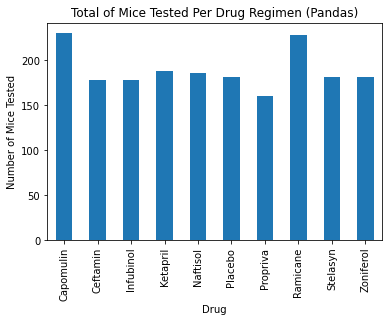

In [194]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#get data for bar chart
bar_chart_pd = combined_data_clean.copy()[['Mouse ID', 'Drug Regimen']]
bar_chart_pd = bar_chart_pd.groupby('Drug Regimen').count().reset_index()
#plot chart with pandas and plt
bar_chart_pd.plot(kind='bar', legend=None, align='center')

#formatting, titles, x&y labels, etc. 
drugs = bar_chart_pd['Drug Regimen']
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drugs)

plt.xlabel("Drug")
plt.ylabel("Number of Mice Tested")

plt.title('Total of Mice Tested Per Drug Regimen (Pandas)')
plt.show()

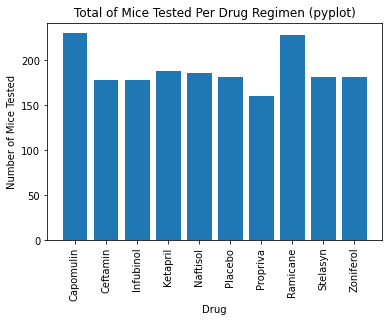

In [195]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#get data for bar chart in pyplot
bar_chart_plt = combined_data_clean.copy()[['Mouse ID', 'Drug Regimen']]
bar_chart_plt = bar_chart_plt.groupby('Drug Regimen').count().reset_index()
#create x & y axis
drugs = bar_chart_plt['Drug Regimen']
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
y_axis = bar_chart_plt['Mouse ID']

#plot with pyplot, formatting, titles, etc. 
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, drugs,rotation=90)
plt.xlabel("Drug")
plt.ylabel("Number of Mice Tested")
plt.title('Total of Mice Tested Per Drug Regimen (pyplot)')
plt.show()

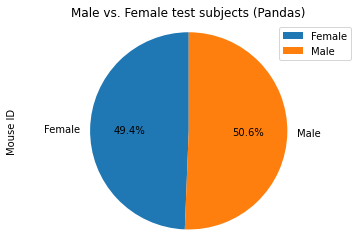

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#get data and count by sex
pie_pd = combined_data_clean.copy()[['Mouse ID', 'Sex']]
pie_pd = pie_pd.groupby('Sex').count()

#plot with pandas as a pie + formatting etc. 
pie_pd.plot(kind='pie', subplots=True, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title('Male vs. Female test subjects (Pandas)')
plt.show()

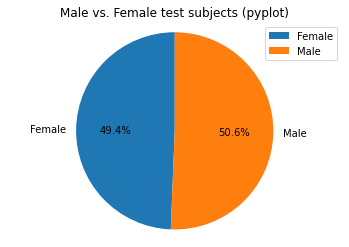

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#get data and count by sex
pie_plt = combined_data_clean.copy()[['Mouse ID', 'Sex']]
pie_plt = pie_plt.groupby('Sex').count().reset_index()


#plot with pandas as a pie + formatting etc. 
labels = pie_plt['Sex']
count = pie_plt['Mouse ID']
plt.pie(count, labels=labels,autopct="%1.1f%%", startangle=90)
plt.title('Male vs. Female test subjects (pyplot)')
plt.legend(loc='best')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = combined_data_clean.copy()
max_timepoint = max_timepoint[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
max_timepoint = max_timepoint.groupby('Mouse ID').max('Timepoint').reset_index()
max_timepoint = max_timepoint.rename(columns={'Tumor Volume (mm3)': 'Last Tumor Volume (mm3)'})
max_timepoint = max_timepoint[['Mouse ID', 'Last Tumor Volume (mm3)']]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_with_max = combined_data_clean.copy()
data_with_max = pd.merge(data_with_max, max_timepoint, on='Mouse ID', how='outer')
data_with_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.000000
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.000000
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.000000
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.000000
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845
1888,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845
1889,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845
1890,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845


In [253]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [treatment for treatment in data_with_max['Drug Regimen']]
treatments = list(dict.fromkeys(treatments))

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_vol = [tumor for tumor in data_with_max['Tumor Volume (mm3)']]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tot_vol_Q1 = data_with_max['Tumor Volume (mm3)'].quantile(.25)
tot_vol_Q3 = data_with_max['Tumor Volume (mm3)'].quantile(.75)
tot_vol_IQE = tot_vol_Q3 - tot_vol_Q1




    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: False

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
